# Project 2C
### Assessing Protein-level Differences in CA2 Hippocampal Region 

Meenakshi Singhal

BIMM 143, Spring 2022

# Introduction

The hippocampus is a specific and crucial region of the brain; as part of the limbic system, it modulates processes like memory consolidation and facilitates neural plasticity, i.e. long-term potentiation. Thus, this region also becomes a central location of deterioration in neurodegenerative conditions like Alzheimer's disease.  


In this study, RNAseq data from both murine and human hippocampi cellular populations were analyzed. Such cellular populations are arranged in a highly organized manner; they include mossy and granule cells from the dentate gyrus, as well as CA1, CA2, and CA3 pyramidal cells. For this project, CA2 pyramidal cells in particular will be assessed. While previously considered merely an extension of the CA3, researchers now understand that the CA2 region is its own distinct part of the hippocampus, with unique form and function. CA2 cells have been hypothesized to be largely responsible for facilitating the process of developing social memories that help us navigate interactions (https://www.frontiersin.org/articles/10.3389/fnbeh.2019.00233/full). To this point, interpreting the exact role of the CA2 region based on its neuronal connecitivities has been difficult.

To better understand how this unique brain structure is organized from a metabolic standpoint, various bioinformatics methods and tools will be applied to the RNAseq data. First, a marker gene for the CA2 region can be identified through literature review; the nucleotide sequences found from NCBI can be compared via sequence alignment. I chose RGS14, which has been implicated in preventing the process of neuronal plasticity in the CA2 region. Neuronal plasticity is widely believed to be something unique to humans in terms of prevalence. Next, Principal component analysis of (RNAseq) gene expression levels and marker gene protein structural analysis can then be generated to further characterize the differences between murine and human CA2 regions. In particular, homology modeling using SWISS Model can allow for relatively easy visual comparisons between the RGS14 protein in humans versus in mice.


- Murine RNAseq data GEO, from Cembrowski et al., Elife 2016: https://www.ncbi.nlm.nih.gov/geo/query/acc.cgi?token=adsveykeprejbej&acc=GSE74985


- Human RNAseq data GEO, from Ahyan et al., Neuron 2021: https://www.ncbi.nlm.nih.gov/geo/query/acc.cgi?acc=GSE160189

## Scientific Question:


How does the heterogeneity of the CA2 neuronal hippocampus populations between mice and humans compare at both single protein and transcriptome levels?

## Scientific Hypothesis: 

If sequence alignment reveals differences between mice and humans for the RGS14 marker gene of the CA2 hippocampus region, then PCA on enriched genes as well as structural analysis of the RGS14 protein will elucidate and reaffirm CA2 cellular heterogeneity between the two species.

## Part 1: Load in Packages

- **Biopython**: A set of bioinformatics tools for processing nucleotide, amino acid, etc sequences. It can take in FASTA and other file types and one can also perform BLAST searches.


- **numpy**: A Python library with various functions to build and manipulate array objects; arrays have faster computation than lists due to "behind-the-scenes" C++ frameworks to process the data.


- **matplotlib**: A Python library to easily visualize various plots and graphs; these include scatterplots and bar graphs; usually takes in an independent (x) and dependent (y) variable, with the ability to create axes labels, limits, and a graph title

In [70]:
import Bio
from Bio import SeqIO  #SeqIO is the input/output interface for Biopython; it allows fasta files to be read in
import numpy as np
import matplotlib.pyplot as plt
from Bio import pairwise2 #pairwise2 calculates pairwise sequence alignment between two genes; you can specify whether to calculate global or local alignment scores
from Bio.Seq import Seq #Seq creates string nucleotide objects 
from Bio.pairwise2 import format_alignment  #nicely visualize alignment relationships between sequences

## Part 2: Performing Bioinformatics Analysis

#### Database 1: NCBI Nucleotide search 

#### Method 1: Pairwise Sequence Alignment of RGS14 gene (a marker gene for CA2 region)

- See https://iiif.elifesciences.org/lax/14997%2Felife-14997-fig3-figsupp1-v1.tif/full/1500,/0/default.jpg
    - can also consider using f2r, pygo1

In [71]:
# Nucleotide search for RGS14 in mouse and human 

#Fasta = list(SeqIO.parse("rgs14_hum.fasta", "fasta")) 

#https://www.ncbi.nlm.nih.gov/nuccore/NC_000005.10?report=fasta&from=177357924&to=177372596
mouse_gene = "GCAGGAGGACGCCTGCGGGTTGCCTCCTGGAGCCTGACATCTAGACTGAAGACTGCTCAGCGACACCAACGAGCCCGGACGCCCTCGAGCTTGCCTTGCCCACTGGTACCTAGCTAGAGAGGGAGGAAGTGGACCGAAGAGTCGGGAAATACTGCTAGGCGAGTTTACCCACATCAGCACCATGGACAACGCACGCAGAAAAACTCCAGCTCGGCTGGATGCTGCCTGCTTCTGGCAGATCTGGCAGCGCTTCGACAAGGAAGAAAAAGGTTACATAAGAGAGACAGAGCTGGATGCCTTCTTTGATCATTTGCTGGCAAAATCTGGCACTGAGGACACTCTTATGGAAGAAAATGTGCAGAAAGTGAAAGAACAGTTGATGACCAGCCACAACGTCTCTAAGGAAGGCCGCATACTGATGAAAGAGCTTGCCAGTATGTTCTTATCTGAAGATGAAAATTTCCTCCTGTTCTTTCGCCTGGAAACTCCCTTGGATAACAGTGTAGAGTTTATGCAGATTTGGCGCAAATACGATGCGGACAGCAGTGGTTTCATATCAGCTGCTGAGCTTTGTAACTTTCTTCGAGACCTTTTCCTCCACCACAAAAAGAACATTTCCGAGGCTGAACTGGAAGAGTATACTAGCACCATGATGAAGATCTTTGACAAAAATAAAGATGGACGTTTGGATCTTAATGACTTGGCAAGGATTCTGGCGCTCCAGGAAAACTTCCTTCTTCAGTTTAAAATGGATGCTTCTTCTACTGAAGAAAGGAAGAGGGACTTTGAGAAAATCTTTGCCCATTACGATGTTAGTAAAACTGGAGCCCTGGAAGGCCCAGAAGTGGATGGATTTGTCAAAGATATGATGGAGCTGGTCCAGCCCAGCATCAGTGGTGTGGATCTGGATAAGTTCCGGGAGATTCTGCTTCGCCATTGCGATGTCAACAAGGATGGAAAGATCCAGAAGTCTGAGCTGGCACTGTGTCTTGGGCTAAAAATAAACCCCTGATCCCCAACTACTCTGCTCTCCACTTAAGTGTCTGTGTTCCTGCTGTGAGAAGTGTGTTTGTGCTTTGCTCTTGGGGACCCAGTTAATGGACCTTCTCCCTGACAGTTTGGTACTCTTGATGGAGGGAGTGGCCCTAGGGTGCTGCTTCCAGAGGCAGCCATGATCTTGTCCCATGGGAAGCCCCATACAGCTTCTTCCATGTTTGTTCCTTGACCTTGGTCTATCTCCTCAAGGGCCTCATTTTACCTGCTCTGTTCAACCTTCCCTATCGCCTGGTGATCCATTCTACCATCTTCTGCTTGTCCTTGAGCTTTCTGCTCAGTTAGAGTGTCACCTGTATCGTGCTGTCACATGTACAAATATGTCTTCTTGTGGAAATAAAGCTGTGGTCAAGAATAAAAAAAAAAAAAAAA"

#https://www.ncbi.nlm.nih.gov/nuccore/NM_006480.5?report=fasta&log$=seqview
hum_gene = "GCTGAGGGCTGAGGGACGGCTCAGCGACGCCACGGCCAGCAGCGCTCGCGTCCTCCCCAGCAACAGTTACTCAAAGCTAATCAGATAGCGAAAGAAGCAGGAGAGCAAGTCAAGAAATACGGTGAAGGAGTCCTTCCCAAAGTTGTCTAGGTCCTTCCGCGCCGGTGCCTGGTCTTCGTCGTCAACACCATGGACAGCTCCCGGGAACCGACTCTGGGGCGCTTGGACGCCGCTGGCTTCTGGCAGGTCTGGCAGCGCTTTGATGCGGATGAAAAAGGTTACATAGAAGAGAAGGAACTCGATGCTTTCTTTCTCCACATGTTGATGAAACTGGGTACTGATGACACGGTCATGAAAGCAAATTTGCACAAGGTGAAACAGCAGTTTATGACTACCCAAGATGCCTCTAAAGATGGTCGCATTCGGATGAAAGAGCTTGCTGGTATGTTCTTATCTGAGGATGAAAACTTTCTTCTGCTCTTTCGCCGGGAAAACCCACTGGACAGCAGCGTGGAGTTTATGCAGATTTGGCGCAAATATGACGCTGACAGCAGTGGCTTTATATCAGCTGCTGAGCTCCGCAACTTCCTCCGAGACCTCTTTCTTCACCACAAAAAGGCCATTTCTGAGGCTAAACTGGAAGAATACACTGGCACCATGATGAAGATTTTTGACAGAAATAAAGATGGTCGGTTGGATCTAAATGACTTAGCAAGGATTCTGGCTCTTCAGGAAAACTTCCTTCTCCAATTTAAAATGGATGCTTGTTCTACTGAAGAAAGGAAAAGGGACTTTGAGAAAATCTTTGCCTACTATGATGTTAGTAAAACAGGAGCCCTGGAAGGCCCAGAAGTGGATGGGTTTGTCAAAGACATGATGGAGCTTGTCCAGCCCAGCATCAGCGGGGTGGACCTTGATAAGTTCCGCGAGATTCTCCTGCGTCACTGCGACGTGAACAAGGATGGAAAAATTCAGAAGTCTGAGCTGGCTTTGTGTCTTGGGCTGAAAATCAACCCATAATCCCAGACTGCTTTGCCTTTTGCTCTTACTATGTTTCTGTGATCTTGCTGGTAGAATTGTATCTGTGCATTGATGTTGGGAACACAGTGGGCAAACTCACAAATGGTGTGCTATTCTTGGGCAAGAACAGGGACGCTAGGGCCTTCCTTCCACCGGCGTGATCTATCCCTGTCTCACTGAAAGCCCCTGTGTAGTGTCTGTGTTGTTTTCCCTTGACCCTGGGCTTTCCTATCCTCCCAAAGACTCAGCTCCCCTGTTAGATGGCTCTGCCTGTCCTTCCCCAGTCACCAGGGTGGGGGGGACAGGGGCAGCTGAGTGCATTCATTTTGTGCTTTTCTTGTGGGCTTTCTGCTTAGTCTGAAAGGTGTGTGGCATTCATGGCAATCCTGTAACTTCAACATAGATTTTTTTGTGTGTGTGGAAATAAATCTGCAATTGGAAACAAAAA"

In [72]:
# mouse_seq contains nucleotide sequence for mouse gene
# hum_seq contains nucleotide sequence for human gene
mouse_seq = Seq(mouse_gene)
hum_seq = Seq(hum_gene)

In [73]:
size = len(hum_seq) 
array = np.empty(shape=(size,1))

def pair_align(array, size):
    for i in range(size):
        # Define two sequences to be aligned
        X = mouse_seq
        Y = hum_seq
        array[i] = int(pairwise2.align.globalxx(X, Y, score_only=True))
    return array

# Use globalxx function to perform pairwise alignment between mouse and human gene seqeunces, which is stored in the global alignments variable 
#alignments = pairwise2.align.globalxx(mouse_seq, hum_seq, score_only=True)

alignments = pair_align(array, size)

In [74]:
#alignments = pairwise2.align.globalxx(mouse_seq, hum_seq)
alignments

array([[1132.],
       [1132.],
       [1132.],
       ...,
       [1132.],
       [1132.],
       [1132.]])

#### Analysis 1: Heat Map

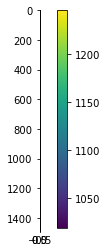

In [75]:
#Create subplot
fig, ax = plt.subplots()

# Visualize heatmap of pairwise alignment 
plt.imshow(alignments)

# Show the axes of heatmap
im = ax.imshow(alignments)

# Add colorbar to show strength of relationships between mouse and human nucleotides for the same gene
cbar = ax.figure.colorbar(im)

# Show the plot
plt.show()

## Part 3A: Protein Structural Analysis of SCGN

#### Database 2: SWISS model


#### Method 2: Homology modeling and structural bioinformatics

Homology Modeling workflow: 
1. alignment
2. backbone generation (minimize energy via insertions/deletions of amino acids)
3. loop modeling
4. side-chain modeling
5. model optimization

#### Analysis 2: 3D protein measurements

In [1]:
# compare structure of murine and human RGS14 protein

## Part 3B: Principal Component Analysis (if time)

#### Database 3: NCBI (GEO)


- Murine RNAseq data GEO, from Cembrowski et al., Elife 2016: https://www.ncbi.nlm.nih.gov/geo/query/acc.cgi?token=adsveykeprejbej&acc=GSE74985


- Human RNAseq data GEO, from Ahyan et al., Neuron 2021: https://www.ncbi.nlm.nih.gov/geo/query/acc.cgi?acc=GSE160189

#### Analysis 3: Principal Component Analysis


In [77]:
#perform PCA on RNAseq data for CA2 genes to understand relationships in 
#genetic architecture between CA2 region of mice and humans

### creating PCA model

brain_model = PCA()

brain_model.fit(df)

transformed = brain_model.transform(df)

features = range(brain_model.n_components_)

normalized_variance = brain_model.explained_variance_/(brain_model.explained_variance_.sum())
print(normalized_variance)

plt.bar(features, normalized_variance)
plt.xticks(features)
plt.ylabel('variance')
plt.xlabel('PCA feature')
plt.show()

### scatterplot of principal components, comparing mouse vs. human CA2 gene expression

PC1 = transformed[:,0]
PC2 = transformed[:,1]
PC3 = transformed[:,2]

plt.scatter(PC1, PC2)
plt.show()